In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
import matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import cv2
image_folder_path = '/content/drive/MyDrive/deteksi plat nomor/dataset'

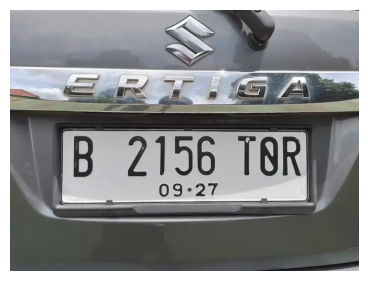

In [156]:
image_files = [os.path.join(image_folder_path, file) for file in os.listdir(image_folder_path)]
X = [np.array(Image.open(image)) for image in image_files]
plt.figure(figsize=(30, 40))
for i in range(min(17, len(X))):
    plt.subplot(10, 5, i + 1)
    plt.axis('off')
    plt.imshow(X[i])
plt.show()

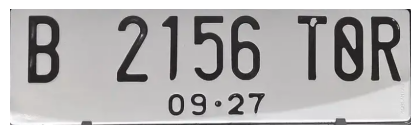

In [157]:
def pakai_canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 100, 200)

    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    for contour in contours:
        epsilon = 0.018 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == 4:
            x, y, w, h = cv2.boundingRect(approx)
            plate_img = image[y:y+h, x:x+w]
            return plate_img

    return None

plt.figure(figsize=(30, 40))
for i in range(min(17, len(X))):
    image_with_box = pakai_canny(X[i].copy())
    plt.subplot(10, 5, i + 1)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
plt.show()

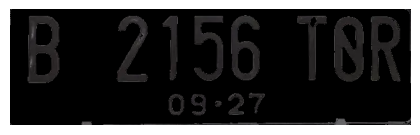

In [158]:
def pakai_otsu(plate_img):
    gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    inverted = cv2.bitwise_not(gray)
    _, binary = cv2.threshold(inverted, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    text_only = cv2.bitwise_and(plate_img, plate_img, mask=binary)
    return text_only

plt.figure(figsize=(30, 40))
for i in range(len(X)):
    plate_img = pakai_canny(X[i].copy())
    if plate_img is not None:
        text_img = pakai_otsu(plate_img)
        plt.subplot(10, 5, i + 1)
        plt.axis('off')
        plt.imshow(cv2.cvtColor(text_img, cv2.COLOR_BGR2RGB))
plt.show()